In [1]:
#导入库、数据、定义神经网络类，完成正向传播

#继承nn.Module类完成正向传播
import torch
import torch.nn as nn
from torch.nn import functional as F

#确定数据
torch.manual_seed(420)
X = torch.rand((500,20),dtype=torch.float32) * 100
y = torch.randint(low=0,high=3,size=(500,),dtype=torch.float32)

#定义神经网路的架构
"""
注意：这是一个三分类的神经网络，因此我们需要调用的损失函数多分类交叉熵函数CEL
CEL类已经内置了softmax功能，因此我们需要修改一下网络架构，删除forward函数中输出层上的softmax函数，并将最终的输出修改为zhat
"""
class Model(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super(Model,self).__init__() #super(请查找这个类的父类，请使用找到的父类替换现在的类)
        self.linear1 = nn.Linear(in_features,13,bias=True) #输入层不用写，这里是隐藏层的第一层
        self.linear2 = nn.Linear(13,8,bias=True)
        self.output = nn.Linear(8,out_features,bias=True)
        
    def forward(self, x):
        sigma1 = torch.relu(self.linear1(x))
        sigma2 = torch.sigmoid(self.linear2(sigma1))
        zhat = self.output(sigma2)
        return zhat

input_ = X.shape[1] #特征的数目
output_ = len(y.unique()) #分类的数目

#实例化神经网络类
torch.manual_seed(420)
net = Model(in_features=input_, out_features=output_)

#前向传播
zhat = net.forward(X)

#定义损失函数
criterion = nn.CrossEntropyLoss()
#对打包好的CorssEnrtopyLoss而言，只需要输入zhat
loss = criterion(zhat,y.long())

loss

net.linear1.weight.grad #不会返回任何值

#反向传播，backward是任意损失函数类都可以调用的方法，对任意损失函数，backward都会求解其中全部w的梯度
loss.backward()

net.linear1.weight.grad #返回相应的梯度

#与可以重复进行的正向传播不同，一次正向传播后，反向传播只能进行一次
#如果希望能够重复进行反向传播，可以在进行第一次反向传播的时候加上参数retain_graph
loss.backward(retain_graph=True)

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

In [1]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

In [11]:
net #正向传播、反向传播

Model(
  (linear1): Linear(in_features=20, out_features=13, bias=True)
  (linear2): Linear(in_features=13, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
)

In [13]:
net.linear1.weight.grad

tensor([[ 3.3726e-04,  8.3354e-05,  4.0867e-04,  4.3058e-05,  1.4551e-04,
          6.5092e-05,  3.7088e-04,  2.8794e-04,  1.0495e-04,  4.7446e-05,
          8.8153e-05,  1.6899e-04,  1.0251e-04,  3.6197e-04,  1.2129e-04,
          7.2405e-05,  1.4479e-04,  4.9114e-06,  1.0770e-04,  9.5156e-05],
        [ 8.2042e-03,  2.1974e-02,  2.1073e-02,  1.3896e-02,  2.2161e-02,
          1.5936e-02,  1.6537e-02,  2.0259e-02,  1.9655e-02,  1.4728e-02,
          1.9212e-02,  2.0087e-02,  1.8295e-02,  8.4133e-03,  1.8036e-02,
          1.9979e-02,  2.0966e-02,  2.4730e-02,  9.3876e-03,  1.7475e-02],
        [ 9.1603e-03,  2.4275e-02,  2.3446e-02,  2.0096e-02,  2.5360e-02,
          1.7406e-02,  3.2556e-02,  2.2461e-02,  3.6794e-03,  2.7445e-02,
          2.1181e-02,  2.7724e-02,  1.7115e-02,  1.6943e-02,  1.7249e-02,
          3.3174e-02,  1.5115e-02,  3.0874e-02,  1.8391e-02,  2.4201e-02],
        [-2.8594e-04,  1.2968e-03,  1.3652e-03, -5.6689e-05, -1.7480e-03,
         -2.6459e-03,  3.7307e-04, 

In [ ]:
#w(t+1) = w(t) - 步长 * grad

In [55]:
lr = 10 #learning_rate, 0.001,0.01,0.05

In [16]:
net.linear1.weight.data

tensor([[ 1.3656e-01, -1.3459e-01,  2.1281e-01, -1.7763e-01, -6.8218e-02,
         -1.5410e-01,  1.7245e-01,  8.3885e-02, -1.1153e-01, -1.7294e-01,
         -1.2947e-01, -4.3138e-02, -1.1413e-01,  1.6295e-01, -9.4082e-02,
         -1.4629e-01, -6.8982e-02, -2.1836e-01, -1.0859e-01, -1.2199e-01],
        [ 4.8127e-02,  1.8186e-01,  2.4149e-02, -1.3032e-01,  9.2056e-02,
         -9.5202e-02, -1.0584e-01, -4.2852e-02, -1.1669e-01,  2.4581e-02,
          1.8152e-01,  3.0500e-02,  1.3506e-01, -1.9425e-01, -1.7591e-01,
         -2.9751e-02,  2.0485e-04,  1.3957e-01, -1.9666e-01,  9.3293e-02],
        [-1.9192e-01,  3.6070e-02,  1.4778e-01,  3.0845e-02,  7.1393e-02,
          1.4217e-01,  2.2122e-01, -1.4032e-01,  7.3255e-02,  1.8409e-01,
          1.2716e-01, -2.0253e-01, -1.5509e-01, -2.1899e-01,  9.8980e-02,
          2.2123e-01, -2.1659e-01,  1.7880e-01, -2.0922e-01, -2.7275e-02],
        [ 1.8144e-01, -3.5166e-02,  2.4801e-02,  1.6299e-01, -1.8755e-01,
          5.6587e-02, -1.0911e-01, 

In [17]:
w = net.linear1.weight.data #现有的权重，w(t)

In [19]:
dw = net.linear1.weight.grad

In [ ]:
#w = w - lr * dw

In [56]:
w -= lr*dw

In [57]:
w

tensor([[ 1.0954e-01, -1.4127e-01,  1.8007e-01, -1.8107e-01, -7.9873e-02,
         -1.5931e-01,  1.4275e-01,  6.0821e-02, -1.1993e-01, -1.7674e-01,
         -1.3653e-01, -5.6674e-02, -1.2234e-01,  1.3395e-01, -1.0380e-01,
         -1.5209e-01, -8.0580e-02, -2.1876e-01, -1.1722e-01, -1.2961e-01],
        [-6.0903e-01, -1.5783e+00, -1.6638e+00, -1.2434e+00, -1.6831e+00,
         -1.3717e+00, -1.4305e+00, -1.6656e+00, -1.6911e+00, -1.1551e+00,
         -1.3574e+00, -1.5784e+00, -1.3303e+00, -8.6816e-01, -1.6206e+00,
         -1.6301e+00, -1.6791e+00, -1.8413e+00, -9.4861e-01, -1.3064e+00],
        [-9.2566e-01, -1.9084e+00, -1.7302e+00, -1.5788e+00, -1.9599e+00,
         -1.2521e+00, -2.3865e+00, -1.9395e+00, -2.2146e-01, -2.0142e+00,
         -1.5694e+00, -2.4232e+00, -1.5260e+00, -1.5762e+00, -1.2827e+00,
         -2.4360e+00, -1.4273e+00, -2.2942e+00, -1.6824e+00, -1.9658e+00],
        [ 2.0435e-01, -1.3904e-01, -8.4551e-02,  1.6753e-01, -4.7541e-02,
          2.6853e-01, -1.3899e-01, 

In [ ]:
#momentum

In [ ]:
# v(t) = gamma * v(t-1)  - lr * dw
# w(t+1) = w(t) + v(t)

In [58]:
lr = 0.1
gamma = 0.9

In [59]:
dw = net.linear1.weight.grad

In [60]:
w = net.linear1.weight.data

In [ ]:
#t = 1，走第一步，进行首次迭代的时候，需要一个v0

In [64]:
net

Model(
  (linear1): Linear(in_features=20, out_features=13, bias=True)
  (linear2): Linear(in_features=13, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
)

In [63]:
dw.shape #500,20

torch.Size([13, 20])

In [65]:
v = torch.zeros(dw.shape[0], dw.shape[1])

In [ ]:
# v(t) = gamma * v(t-1)  - lr * dw
# w(t+1) = w(t) + v(t)

In [84]:
v = gamma * v - lr * dw
w += v

In [85]:
w

tensor([[ 1.0815e-01, -1.4162e-01,  1.7838e-01, -1.8125e-01, -8.0475e-02,
         -1.5958e-01,  1.4121e-01,  5.9629e-02, -1.2037e-01, -1.7694e-01,
         -1.3689e-01, -5.7373e-02, -1.2277e-01,  1.3245e-01, -1.0430e-01,
         -1.5239e-01, -8.1179e-02, -2.1878e-01, -1.1767e-01, -1.3001e-01],
        [-6.4298e-01, -1.6692e+00, -1.7510e+00, -1.3009e+00, -1.7748e+00,
         -1.4376e+00, -1.4989e+00, -1.7494e+00, -1.7724e+00, -1.2161e+00,
         -1.4369e+00, -1.6615e+00, -1.4060e+00, -9.0297e-01, -1.6952e+00,
         -1.7128e+00, -1.7659e+00, -1.9436e+00, -9.8746e-01, -1.3788e+00],
        [-9.6357e-01, -2.0088e+00, -1.8272e+00, -1.6620e+00, -2.0649e+00,
         -1.3241e+00, -2.5212e+00, -2.0324e+00, -2.3669e-01, -2.1278e+00,
         -1.6571e+00, -2.5379e+00, -1.5968e+00, -1.6463e+00, -1.3541e+00,
         -2.5732e+00, -1.4899e+00, -2.4220e+00, -1.7585e+00, -2.0659e+00],
        [ 2.0553e-01, -1.4441e-01, -9.0200e-02,  1.6777e-01, -4.0307e-02,
          2.7948e-01, -1.4054e-01, 

In [2]:
##导入库
#确定数据、超参数的确定（lr，gamma）
#定义伸进网络的架构类Model，类Model需要输入的参数
##实例化神经网络的类 - 让神经网络准备好进行正向传播
#定义损失函数
#定义优化算法

import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F

In [3]:
#确定数据

In [4]:
torch.manual_seed(420)
X = torch.rand((500,20),dtype=torch.float32) * 100
y = torch.randint(low=0,high=3,size=(500,),dtype=torch.float32)

In [5]:
lr = 0.1
gamma = 0.9

In [6]:
#定义神经网路的架构
"""
注意：这是一个三分类的神经网络，因此我们需要调用的损失函数多分类交叉熵函数CEL
CEL类已经内置了softmax功能，因此我们需要修改一下网络架构，删除forward函数中输出层上的softmax函数，并将最终的输出修改为zhat
"""
class Model(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super(Model,self).__init__() #super(请查找这个类的父类，请使用找到的父类替换现在的类)
        self.linear1 = nn.Linear(in_features,13,bias=True) #输入层不用写，这里是隐藏层的第一层
        self.linear2 = nn.Linear(13,8,bias=True)
        self.output = nn.Linear(8,out_features,bias=True)
        
    def forward(self, x):
        sigma1 = torch.relu(self.linear1(x))
        sigma2 = torch.sigmoid(self.linear2(sigma1))
        zhat = self.output(sigma2)
        return zhat

In [108]:
input_ = X.shape[1] #特征的数目
output_ = len(y.unique()) #分类的数目

In [109]:
#实例化神经网络类
torch.manual_seed(420)
net = Model(in_features=input_, out_features=output_)

In [111]:
net.linear1.weight

Parameter containing:
tensor([[ 1.3656e-01, -1.3459e-01,  2.1281e-01, -1.7763e-01, -6.8218e-02,
         -1.5410e-01,  1.7245e-01,  8.3885e-02, -1.1153e-01, -1.7294e-01,
         -1.2947e-01, -4.3138e-02, -1.1413e-01,  1.6295e-01, -9.4082e-02,
         -1.4629e-01, -6.8982e-02, -2.1836e-01, -1.0859e-01, -1.2199e-01],
        [ 4.8127e-02,  1.8186e-01,  2.4149e-02, -1.3032e-01,  9.2056e-02,
         -9.5202e-02, -1.0584e-01, -4.2852e-02, -1.1669e-01,  2.4581e-02,
          1.8152e-01,  3.0500e-02,  1.3506e-01, -1.9425e-01, -1.7591e-01,
         -2.9751e-02,  2.0485e-04,  1.3957e-01, -1.9666e-01,  9.3293e-02],
        [-1.9192e-01,  3.6070e-02,  1.4778e-01,  3.0845e-02,  7.1393e-02,
          1.4217e-01,  2.2122e-01, -1.4032e-01,  7.3255e-02,  1.8409e-01,
          1.2716e-01, -2.0253e-01, -1.5509e-01, -2.1899e-01,  9.8980e-02,
          2.2123e-01, -2.1659e-01,  1.7880e-01, -2.0922e-01, -2.7275e-02],
        [ 1.8144e-01, -3.5166e-02,  2.4801e-02,  1.6299e-01, -1.8755e-01,
          5.6

In [112]:
net.parameters() #一次性导出现有神经网络架构下全部的权重和截距

<generator object Module.parameters at 0x0000028EDCA2BC10>

In [113]:
for x in net.parameters():
    print(x)

Parameter containing:
tensor([[ 1.3656e-01, -1.3459e-01,  2.1281e-01, -1.7763e-01, -6.8218e-02,
         -1.5410e-01,  1.7245e-01,  8.3885e-02, -1.1153e-01, -1.7294e-01,
         -1.2947e-01, -4.3138e-02, -1.1413e-01,  1.6295e-01, -9.4082e-02,
         -1.4629e-01, -6.8982e-02, -2.1836e-01, -1.0859e-01, -1.2199e-01],
        [ 4.8127e-02,  1.8186e-01,  2.4149e-02, -1.3032e-01,  9.2056e-02,
         -9.5202e-02, -1.0584e-01, -4.2852e-02, -1.1669e-01,  2.4581e-02,
          1.8152e-01,  3.0500e-02,  1.3506e-01, -1.9425e-01, -1.7591e-01,
         -2.9751e-02,  2.0485e-04,  1.3957e-01, -1.9666e-01,  9.3293e-02],
        [-1.9192e-01,  3.6070e-02,  1.4778e-01,  3.0845e-02,  7.1393e-02,
          1.4217e-01,  2.2122e-01, -1.4032e-01,  7.3255e-02,  1.8409e-01,
          1.2716e-01, -2.0253e-01, -1.5509e-01, -2.1899e-01,  9.8980e-02,
          2.2123e-01, -2.1659e-01,  1.7880e-01, -2.0922e-01, -2.7275e-02],
        [ 1.8144e-01, -3.5166e-02,  2.4801e-02,  1.6299e-01, -1.8755e-01,
          5.6

In [110]:
#定义损失函数
criterion = nn.CrossEntropyLoss()

In [ ]:
#定义优化算法

In [114]:
opt = optim.SGD(net.parameters()#需要进行迭代的权重
                ,lr = lr
                ,momentum = gamma
               )

In [ ]:
#向前传播
#本轮向前传播的损失函数值
#反向传播 - 得到了梯度
#更新权重（和动量）
#清空梯度 - 清除原来计算出来的，基于上一个点的坐标计算的梯度

In [148]:
X.shape

torch.Size([500, 20])

In [130]:
zhat = net.forward(X) #最后一个线性层的输出结果，向前传播
loss = criterion(zhat, y.reshape(500).long()) #计算损失函数
loss.backward()
opt.step() #步子，走一步，更新权重w，更新动量v
opt.zero_grad()

print(loss)
print(net.linear1.weight.data[0][:10])

tensor(1.0643, grad_fn=<NllLossBackward>)
tensor([ 0.1435, -0.1329,  0.2212, -0.1767, -0.0652, -0.1528,  0.1800,  0.0898,
        -0.1094, -0.1720])


In [ ]:
#epoch = 60 #请让神经网络学习60次全部数据
#把全数据X划分为10个batch

In [149]:
for epochs in range(epoch):
    for batch in range(batch):
        zhat = net.forward(X) #最后一个线性层的输出结果，向前传播
        loss = criterion(zhat, y.reshape(500).long()) #计算损失函数
        loss.backward()
        opt.step() #步子，走一步，更新权重w，更新动量v
        opt.zero_grad()

SyntaxError: invalid character in identifier (<ipython-input-149-c722bef8e3a0>, line 1)

In [150]:
import torch

In [ ]:
#TensorDataset

In [151]:
from torch.utils.data import TensorDataset

In [152]:
a = torch.randn(500,2,3) #三维数据 - 二维表格

In [153]:
b = torch.randn(500,3,4,5) #四维数据 - 图像

In [161]:
c = torch.randn(500,1) #二维数据 - 标签

In [ ]:
#被合并的对象第一维度上的值相等

In [162]:
for x in TensorDataset(b,c):#generator
    print(x)
    break

(tensor([[[ 0.3641,  1.1461,  1.3315, -0.6803, -0.1573],
         [-0.3813,  0.0569,  1.4741, -0.2237,  0.4374],
         [ 0.4338,  0.7315, -0.2749,  0.0160, -0.2451],
         [-0.5867, -0.5889,  1.8905, -0.7718, -1.7899]],

        [[-0.4048,  0.7898,  0.3773,  0.7166,  0.0490],
         [-0.9121, -0.0489, -0.8179, -1.8548, -0.3418],
         [ 0.0873,  0.3071, -0.9272,  1.4546, -0.8360],
         [ 1.2235,  1.2197, -0.5222,  0.2297, -0.8180]],

        [[ 0.4578, -2.0396, -0.1589, -0.3033, -0.6102],
         [ 1.1299,  0.8919, -0.5627,  0.4364, -0.2321],
         [ 0.1634,  1.4667, -0.7651, -0.6503,  0.0228],
         [ 0.8123,  0.9057,  1.3573, -0.3826,  0.2580]]]), tensor([-0.6932]))


In [ ]:
#DataLoader - 用来切割小批量的类

In [164]:
data = TensorDataset(b,c)

In [163]:
from torch.utils.data import DataLoader

In [166]:
for x in DataLoader(data):
    print(x)
    break

[tensor([[[[ 0.3641,  1.1461,  1.3315, -0.6803, -0.1573],
          [-0.3813,  0.0569,  1.4741, -0.2237,  0.4374],
          [ 0.4338,  0.7315, -0.2749,  0.0160, -0.2451],
          [-0.5867, -0.5889,  1.8905, -0.7718, -1.7899]],

         [[-0.4048,  0.7898,  0.3773,  0.7166,  0.0490],
          [-0.9121, -0.0489, -0.8179, -1.8548, -0.3418],
          [ 0.0873,  0.3071, -0.9272,  1.4546, -0.8360],
          [ 1.2235,  1.2197, -0.5222,  0.2297, -0.8180]],

         [[ 0.4578, -2.0396, -0.1589, -0.3033, -0.6102],
          [ 1.1299,  0.8919, -0.5627,  0.4364, -0.2321],
          [ 0.1634,  1.4667, -0.7651, -0.6503,  0.0228],
          [ 0.8123,  0.9057,  1.3573, -0.3826,  0.2580]]]]), tensor([[-0.6932]])]


In [ ]:
#500 - 120, 120, 120, 120, 20

In [168]:
bs = 120

In [174]:
dataset = DataLoader(data
          , batch_size = bs
          , shuffle = True #划分小批量之前请随机打乱我们的数据
          , drop_last = True #你要舍弃最后一个batch吗？
          )

In [175]:
for i in dataset:
    print(i[0].shape)

torch.Size([120, 3, 4, 5])
torch.Size([120, 3, 4, 5])
torch.Size([120, 3, 4, 5])
torch.Size([120, 3, 4, 5])


In [176]:
len(dataset) #一共有多少个batch

4

In [178]:
len(dataset.dataset) #展示里面全部的数据

500

In [180]:
dataset.dataset[0] #单个样本

(tensor([[[ 0.3641,  1.1461,  1.3315, -0.6803, -0.1573],
          [-0.3813,  0.0569,  1.4741, -0.2237,  0.4374],
          [ 0.4338,  0.7315, -0.2749,  0.0160, -0.2451],
          [-0.5867, -0.5889,  1.8905, -0.7718, -1.7899]],
 
         [[-0.4048,  0.7898,  0.3773,  0.7166,  0.0490],
          [-0.9121, -0.0489, -0.8179, -1.8548, -0.3418],
          [ 0.0873,  0.3071, -0.9272,  1.4546, -0.8360],
          [ 1.2235,  1.2197, -0.5222,  0.2297, -0.8180]],
 
         [[ 0.4578, -2.0396, -0.1589, -0.3033, -0.6102],
          [ 1.1299,  0.8919, -0.5627,  0.4364, -0.2321],
          [ 0.1634,  1.4667, -0.7651, -0.6503,  0.0228],
          [ 0.8123,  0.9057,  1.3573, -0.3826,  0.2580]]]),
 tensor([-0.6932]))

In [181]:
dataset.dataset[0][0]

tensor([[[ 0.3641,  1.1461,  1.3315, -0.6803, -0.1573],
         [-0.3813,  0.0569,  1.4741, -0.2237,  0.4374],
         [ 0.4338,  0.7315, -0.2749,  0.0160, -0.2451],
         [-0.5867, -0.5889,  1.8905, -0.7718, -1.7899]],

        [[-0.4048,  0.7898,  0.3773,  0.7166,  0.0490],
         [-0.9121, -0.0489, -0.8179, -1.8548, -0.3418],
         [ 0.0873,  0.3071, -0.9272,  1.4546, -0.8360],
         [ 1.2235,  1.2197, -0.5222,  0.2297, -0.8180]],

        [[ 0.4578, -2.0396, -0.1589, -0.3033, -0.6102],
         [ 1.1299,  0.8919, -0.5627,  0.4364, -0.2321],
         [ 0.1634,  1.4667, -0.7651, -0.6503,  0.0228],
         [ 0.8123,  0.9057,  1.3573, -0.3826,  0.2580]]])

In [182]:
dataset.dataset[0][1]

tensor([-0.6932])

In [183]:
dataset.batch_size #查看现有的batch_size

120

In [ ]:
#TensorDataset - 将特征与标签合并到同一个对象中
#DataLoader - 帮助我们进行小批量的分割

In [ ]:
for epochs in range(epoch): #每一个epoch下面进行batch循环
    for x,y in #DataLoader生成的对象:

In [ ]:
#带大家认识fashion-MINST数据集

In [12]:
import torchvision
import torchvision.transforms as transforms #处理数据模块

In [ ]:
#dataloader、TensorDataset - 对数据的结构、归纳方式进行变换
#torchvision.transforms - 对数据集的数字本身进行修改

In [35]:
mnist = torchvision.datasets.FashionMNIST(root = "D:\Pythonwork\DEEP LEARNING\Datasets\FashionMNIST" #你的计算机上的某个目录
                                          ,download = False
                                          , train = True
                                          , transform = transforms.ToTensor()
                                         ) #实例化数据

In [36]:
mnist #对于数据的一个说明

Dataset FashionMNIST
    Number of datapoints: 60000
    Split: train
    Root Location: D:\Pythonwork\DEEP LEARNING\Datasets\FashionMNIST
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [38]:
len(mnist)

60000

In [40]:
mnist.data.shape #特征张量

torch.Size([60000, 28, 28])

In [ ]:
#[60000,1,28,28]

In [ ]:
#(sample_size, H- height, W - width, C - color)

In [42]:
mnist.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
mnist.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [45]:
import matplotlib.pyplot as plt
import numpy

In [57]:
mnist[0][0].shape

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

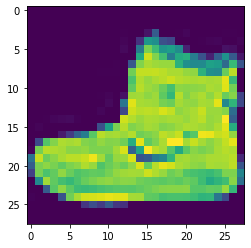

In [52]:
plt.imshow(mnist[0][0].view(28,28).numpy()); #imageshow

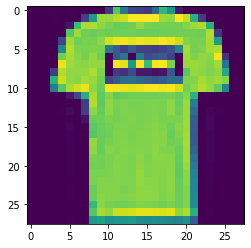

In [53]:
plt.imshow(mnist[1][0].view(28,28).numpy());

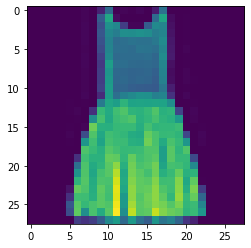

In [56]:
plt.imshow(mnist[30001][0].view(28,28).numpy());

In [ ]:
#TensorDataset 不需要
#小批量的划分

In [ ]:
#导入库

In [11]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms 

In [12]:
#确定数据、确定超参数

lr = 0.15
gamma = 0
epochs = 10
bs = 128

In [13]:
mnist = torchvision.datasets.FashionMNIST(root = "D:\Pythonwork\DEEP LEARNING\Datasets\FashionMNIST" #你的计算机上的某个目录
                                          ,download = False
                                          , train = True
                                          , transform = transforms.ToTensor()
                                         )

In [14]:
#放入进行迭代的数据结构是什么样的？

In [15]:
batchdata = DataLoader(mnist
                       ,batch_size = bs
                       ,shuffle = True)

In [16]:
for x,y in batchdata:
    print(x.shape)
    print(y.shape)
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [17]:
#(500,20) - 20
#x - 四维 （128,28*28）

In [18]:
input_ = mnist.data[0].numel() #请问这个张量中总共有多少元素呢？

In [19]:
output_ = len(mnist.targets.unique())

In [20]:
#定义神经网络的架构

In [21]:
class Model(nn.Module):
    def __init__(self, in_features=10, out_features=2):
        super().__init__()
        self.linear1 = nn.Linear(in_features,1280,bias=False)
        self.output = nn.Linear(1280,out_features, bias=False)
    
    def forward(self, x):
        x = x.view(-1,28*28)
        sigma1 = torch.relu(self.linear1(x))
        sigma2 = F.log_softmax(self.output(sigma1),dim=1)
        return sigma2

In [22]:
#view(-1,) #需要对数据结构进行一个改变，-1作为占位符，表示请pytorch帮助我们自动计算-1这个位置的维度应是多少

In [23]:
x = torch.randn(30,40)

In [24]:
x = x.view(-1,20)

In [25]:
x.shape

torch.Size([60, 20])

In [26]:
#定义损失函数、优化算法、梯度下降的流程

In [27]:
#定义一个训练函数

In [28]:
#128

In [29]:
469/125

3.752

In [30]:
len(batchdata)-1 #469个batch

468

In [31]:
def fit(net,bacthdata,lr=0.01, epochs=5, gamma = 0):
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(),lr=lr,momentum = gamma)
    correct = 0 #循环开始之前，预测正确的值为0
    samples = 0 #循环开始之前，模型一个样本都没有见过
    for epoch in range(epochs): #全数据被训练几次
        for batch_idx,(x,y) in enumerate(batchdata):
            y = y.view(x.shape[0]) #降维
            sigma = net.forward(x) #正向传播
            loss = criterion(sigma,y)
            loss.backward()
            opt.step()
            opt.zero_grad()
            
            #求解准确率，全部判断正确的样本数量/已经看过的总样本量
            yhat = torch.max(sigma, 1)[1] #torch.max函数结果中的索引为1的部分
            correct += torch.sum(yhat == y)
            samples += x.shape[0]
            #每训练一个batch的数据，模型见过的数据就会增加x.shape[0]
            
            if (batch_idx + 1) % 125 == 0 or batch_idx == len(batchdata)-1: #每N个batch我就打印一次
                print("Epoch{}:[{}/{}({:.0f}%)],Loss:{:.6f},Accuracy:{:.3f}".format(
                    epoch+1
                    ,samples
                    ,epochs*len(batchdata.dataset)
                    ,100*samples/(epochs*len(batchdata.dataset))
                    ,loss.data.item()
                    ,float(100*correct/samples)
                     ))
            #分子代表：已经查看过的数据有多少
            #分母代表：在现有的epochs设置，模型一共需要查看多少数据

In [32]:
print("实验一下，这里是值{}".format("A"))

实验一下，这里是值A


In [33]:
list = ["A","B","C"]

In [34]:
for x in enumerate(list):
    print(x)

(0, 'A')
(1, 'B')
(2, 'C')


In [35]:
l = torch.tensor([[0.3,0.4,0.25],[0.7,0.2,0.1]])

In [36]:
l

tensor([[0.3000, 0.4000, 0.2500],
        [0.7000, 0.2000, 0.1000]])

In [37]:
torch.max(l,1)[1] #softmax的预测标签

tensor([1, 0])

In [38]:
l = torch.tensor([True,False,True])

In [39]:
torch.sum(l) #True = 1, False = 0

tensor(2)

In [40]:
#训练与评估

In [41]:
torch.manual_seed(420)
net = Model(in_features=input_, out_features=output_)
fit(net,batchdata,lr=lr,epochs=epochs,gamma=gamma)

Epoch1:[16000/600000(3%)],Loss:0.727888,Accuracy:68.819
Epoch1:[32000/600000(5%)],Loss:0.513726,Accuracy:73.550
Epoch1:[48000/600000(8%)],Loss:0.459364,Accuracy:76.173
Epoch1:[60000/600000(10%)],Loss:0.563562,Accuracy:77.373
Epoch2:[76000/600000(13%)],Loss:0.433777,Accuracy:78.687
Epoch2:[92000/600000(15%)],Loss:0.363204,Accuracy:79.634
Epoch2:[108000/600000(18%)],Loss:0.443800,Accuracy:80.304
Epoch2:[120000/600000(20%)],Loss:0.442278,Accuracy:80.723
Epoch3:[136000/600000(23%)],Loss:0.543707,Accuracy:81.285
Epoch3:[152000/600000(25%)],Loss:0.354620,Accuracy:81.691
Epoch3:[168000/600000(28%)],Loss:0.526626,Accuracy:82.088
Epoch3:[180000/600000(30%)],Loss:0.411618,Accuracy:82.367
Epoch4:[196000/600000(33%)],Loss:0.350448,Accuracy:82.678
Epoch4:[212000/600000(35%)],Loss:0.345022,Accuracy:83.008
Epoch4:[228000/600000(38%)],Loss:0.474553,Accuracy:83.263
Epoch4:[240000/600000(40%)],Loss:0.324190,Accuracy:83.479
Epoch5:[256000/600000(43%)],Loss:0.317327,Accuracy:83.738
Epoch5:[272000/600000(4